In [377]:
import numpy as np 
import pandas as pd 

In [378]:
# Load data
df = pd.read_csv('./battery_motor_log_example1 (no time specified).csv')
df.dropna(how='all', inplace=True) 
data = df.to_numpy()

In [379]:
data[0]

array([0.      , 3.689736, 0.      , 0.      , 0.      , 0.      ])

In [380]:
def matrix_extract(array, pos):

    # Transpose the array
    transposed_array = array.T

    # Convert each row of the transposed array to a list
    result_lists = [row.tolist() for row in transposed_array]

    # Print the result lists
    return result_lists[pos]

In [381]:
u1 = matrix_extract(data, 2)
u2 = matrix_extract(data, 3)
u3 = matrix_extract(data, 4)
u4 = matrix_extract(data, 5)

N = len(u1)
X=np.ones((N,9))
y = matrix_extract(data, 1)
ytrue=np.zeros(N)

In [382]:
u1=(u1-np.mean(u1))/np.std(u1)/3
u2=(u2-np.mean(u2))/np.std(u2)/3
u3=(u3-np.mean(u3))/np.std(u3)/3
u4=(u4-np.mean(u4))/np.std(u4)/3

meany=np.mean(y)
stdy=np.std(y)

y=(y-meany)/stdy/3

In [383]:
for k in range(2,N):    
    #filling X matrix
    X[k,1]=u1[k-1]
    X[k,2]=u1[k-2]
    X[k,3]=u2[k-1]
    X[k,4]=u2[k-2]
    X[k,5]=u3[k-1]
    X[k,6]=u3[k-2]
    X[k,7]=u4[k-1]
    X[k,8]=u4[k-2]

In [384]:
#====LNU with Least Squares

X=X[2:,:]
y=y[2:]
ytrue=ytrue[2:]

In [385]:
w=np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

yn=np.dot(X,w)   # neuron output

In [386]:
yn=yn*3*stdy+meany  # returning to original scale of data
y=y*3*stdy+meany

e=y-yn
etrue=ytrue-yn

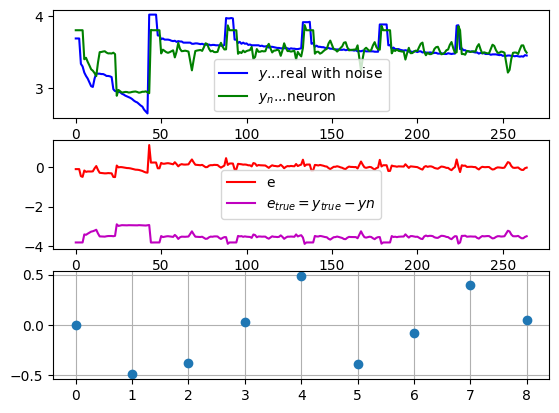

In [389]:
from matplotlib.pyplot import *

figure()
subplot(311)
plot(y,'b',label="$y$...real with noise")
# plot(ytrue,'m',label="$y_{true}$...without noise")
plot(yn,'g',label="$y_n$...neuron");legend()
subplot(312)
plot(e,'r',label="e")
plot(etrue,'m',label="$e_{true}=y_{true}-y{n}$");legend()
subplot(313)
plot(w,'o');grid()
show()

In [388]:
from scipy.stats import pearsonr

corr_val = pearsonr(y, yn) 
print('Validation correlation:', corr_val[0])

Validation correlation: 0.7837030572275573
